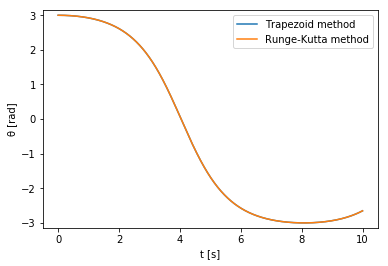

In [ ]:
# This script is used to model the case of the nonlinear pendulum using the trapezoid and Runge-Kutta methods.
# A plot is generated which compares the results of the two methods.

import matplotlib.pyplot as plt
import numpy as np
import math

# Values are defined for the gravitational constant and length of the pendulum.
g = 1.0
L = 1.0

# Defines the damping constant, as well as the amplitude and angular frequency of the driving force.
# Note that in this scenario the damping force and driving force are both set to zero.
k = 0.0
A = 0.0
phi = 0.66667

# A function defining equation 11 in the lab document which calculates the motion of the system.
def f(theta,omega,t):
 force =  -(g/L)*math.sin(theta) - k*omega +A*math.cos(phi*t)
 return force

# Initial conditions for the system are set as well as the time increment dt.
theta = 3.0
omega = 0.0
t = 0.0
dt = 0.01

# Separate variables/variable lists are defined for the Runge-Kutta and trapezoid methods so that
# their calculations can be carried out and plotted separately for the same system.
RK_theta_list = [theta]
RK_omega_list = [omega]
RK_t_list = [t]
tz_theta_list = [theta]
tz_omega_list = [omega]
tz_t_list = [t]

RK_theta = theta
RK_omega = omega
RK_t = t
tz_theta = theta
tz_omega = omega
tz_t = t

# This loop uses the trapezoid method to integrate theta and omega 
# for a number of time steps equal to the given range.
for i in range(1000):
  k1a = dt * tz_omega
  k1b = dt * f(tz_theta, tz_omega, tz_t)
  k2a = dt * (tz_omega + k1b)
  k2b = dt * f(tz_theta + k1a, tz_omega + k1b, tz_t + dt)
  tz_theta = tz_theta + (k1a + k2a)/2
  tz_omega = tz_omega + (k1b + k2b)/2


  # Update time step.
  tz_t = tz_t + dt
    
  # Append the updated values to their corresponding lists.
  tz_theta_list.append(tz_theta)
  tz_omega_list.append(tz_omega)
  tz_t_list.append(tz_t)
  
# This loop uses the Runge-Kutta method to integrate theta and omega 
# for a number of time steps equal to the given range.
for i in range(1000):
  k1a = dt * RK_omega
  k1b = dt * f(RK_theta, RK_omega, RK_t)
  k2a = dt * (RK_omega + k1b/2)
  k2b = dt * f(RK_theta + k1a/2, RK_omega + k1b/2, RK_t + dt/2)
  k3a = dt * (RK_omega + k2b/2)
  k3b = dt * f(RK_theta + k2a/2, RK_omega + k2b/2, RK_t + dt/2)
  k4a = dt * (RK_omega + k3b)
  k4b = dt * f(RK_theta + k3a, RK_omega + k3b, RK_t + dt)
  
  RK_theta = RK_theta + (k1a + 2 * k2a + 2 * k3a + k4a) / 6
  RK_omega = RK_omega + (k1b + 2 * k2b + 2 * k3b + k4b) /6

  # Update time step.
  RK_t = RK_t + dt

  # Append the updated values to their corresponding lists.
  RK_theta_list.append(RK_theta)
  RK_omega_list.append(RK_omega)
  RK_t_list.append(RK_t)
  

# A plot of theta and omega over time is generated.
plt.plot(tz_t_list, tz_theta_list, label='Trapezoid method')
plt.plot(RK_t_list, RK_theta_list, label='Runge-Kutta method')
plt.xlabel('t [s]')
plt.ylabel('θ [rad]')
plt.ylim([-np.pi,np.pi])
plt.legend()

plt.show()